In [237]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

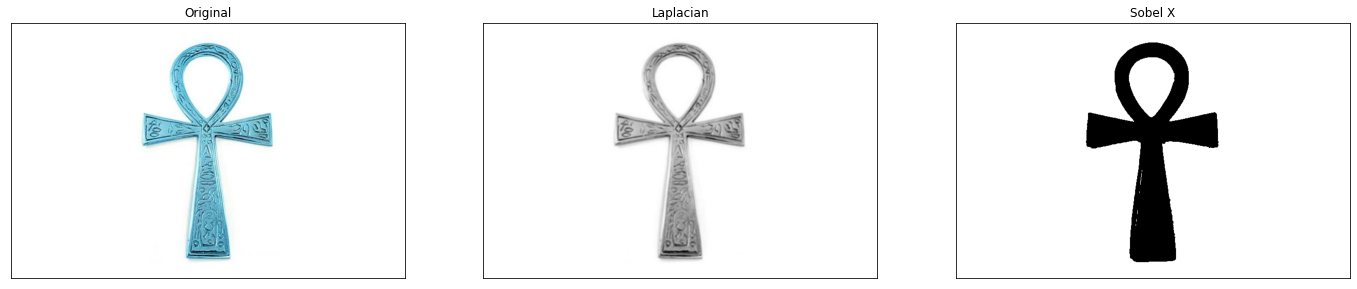

In [254]:
im = cv2.imread('rebirth.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret,thresh = cv2.threshold(imgray,245,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()




In [275]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 1, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 8, (255,0,0), 3)

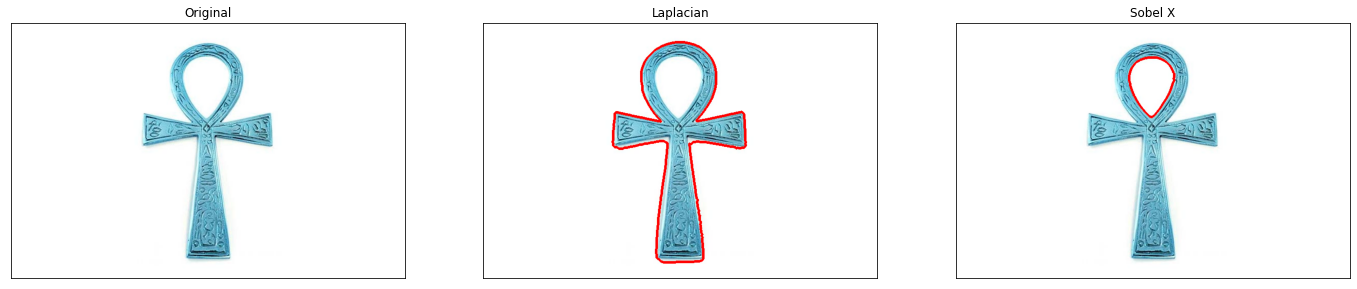

In [276]:

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [241]:
print(len(contours))

9


In [314]:
cnt = contours[1]
M = cv2.moments(cnt)
print (M)

{'m00': 47975.0, 'm10': 18361225.0, 'm01': 10952896.166666666, 'm20': 7145640364.166666, 'm11': 4193265187.1666665, 'm02': 3147976248.6666665, 'm30': 2825493128058.1, 'm21': 1629425284773.45, 'm12': 1205688468604.95, 'm03': 1049113032687.3501, 'mu20': 118343157.27505589, 'mu11': 1319571.3708529472, 'mu02': 647383555.8520474, 'mu30': 93207861.71728516, 'mu21': -2964811042.0218277, 'mu12': 277182459.1755066, 'mu03': 34815862884.56323, 'nu20': 0.051417763789952, 'nu11': 0.0005733276905296927, 'nu02': 0.2812753649873759, 'nu30': 0.0001848907083926573, 'nu21': -0.005881113499550781, 'nu12': 0.0005498298135668349, 'nu03': 0.0690620880409573}


In [315]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [316]:
img0 = cv2.rectangle(img0,(cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
img1 = cv2.drawContours(img1,approx, 0,(255,0,0),3)

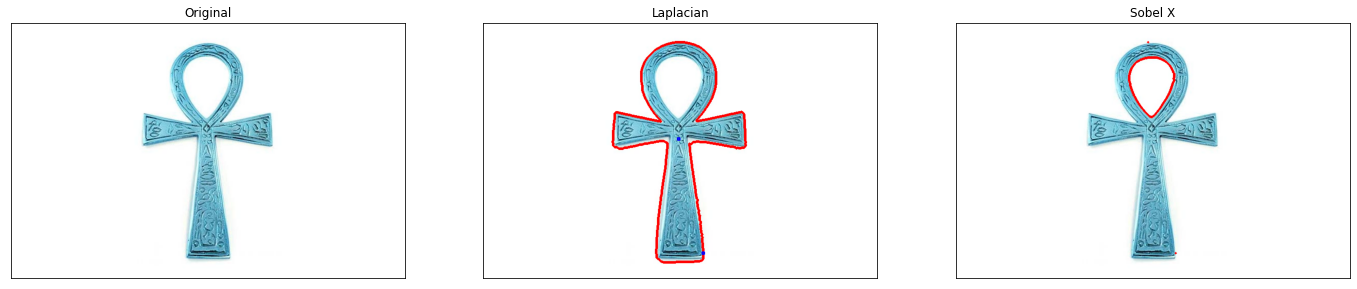

In [317]:

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [309]:
size = []
for i in range(len(contours)):
    size.append((i,contours[i].shape[0]))

print(size)

[(0, 4), (1, 507), (2, 2), (3, 2), (4, 2), (5, 2), (6, 10), (7, 2), (8, 152)]
